# RODA data

In [11]:
import pandas as pd

INPUT_DATETIME_FORMAT = "%m/%d/%y %H:%M"
OUTPUT_DATETIME_FORMAT = "%Y-%m-%d %H:%M"

original_df = pd.read_csv("./results/datos_roda_processed.csv")
original_df['timestampStart'] = pd.to_datetime(original_df['timestampStart'], format=OUTPUT_DATETIME_FORMAT)
original_df['timestampEnd'] = pd.to_datetime(original_df['timestampEnd'], format=OUTPUT_DATETIME_FORMAT)
original_df['date'] = original_df['timestampStart'].dt.strftime("%Y-%m-%d")

## RODA Number of Delivery Routes per Day, per Device

In [12]:
original_df_counts = original_df[['gpsID', 'date']].value_counts()
original_df_counts

gpsID    date      
Xch1238  2023-10-25    15
         2023-12-03    15
         2023-11-28    14
         2023-10-03    14
Xch1567  2023-10-22    13
                       ..
Xch1431  2023-06-23     1
         2023-06-29     1
         2023-07-07     1
         2023-07-10     1
Xch1592  2023-12-11     1
Length: 2368, dtype: int64

The result dataset shows there is not any device logging over 30 delivery routes per day. Indicating everything should be ok. As maximum, per day per device, it reports 16 routes.

## Minimum and Maximum Distance Analysis

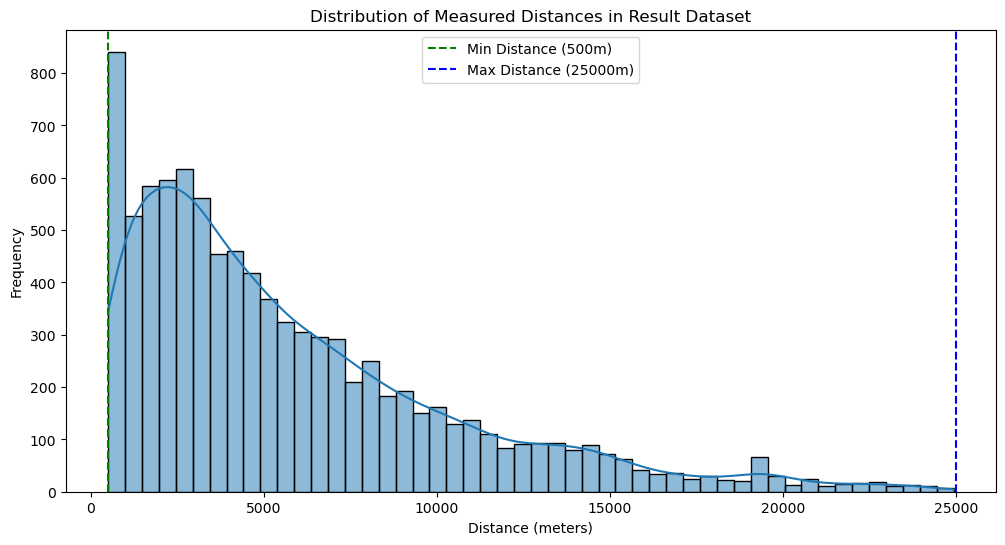

count     9276.000000
mean      5804.009408
std       4742.099815
min        500.218000
25%       2261.247500
50%       4407.560000
75%       8017.735000
max      24926.100000
Name: measuredDistance, dtype: float64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the distribution of measured distances
plt.figure(figsize=(12, 6))
sns.histplot(original_df['measuredDistance'], bins=50, kde=True)
plt.title('Distribution of Measured Distances in Result Dataset')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')

# Setting x-axis limits to focus on the area with more routes
# For example, focusing on distances less than 500 meters
#plt.xlim(0, 1200)

# initial and proposed thresholds
plt.axvline(500, color='g', linestyle='--', label='Min Distance (500m)')
plt.axvline(25000, color='b', linestyle='--', label='Max Distance (25000m)')
plt.legend()
plt.show()

# Display basic statistical details of the measured distances
distance_stats = original_df['measuredDistance'].describe()
print(distance_stats)

Our analysis indicates that we are currently filtering out data that falls outside the valid distance range for a delivery driver's route. The data reveals an average distance of 5.8 kilometers per route, with 75% of routes being shorter than 8 kilometers. Given these insights, and to align more closely with the realities of Rappi's operations and Bogotá's geography, I suggest setting the maximum distance for a valid delivery route at 15 kilometers. This threshold would provide a more realistic and practical framework for our analysis.

## Duration distribution analysis

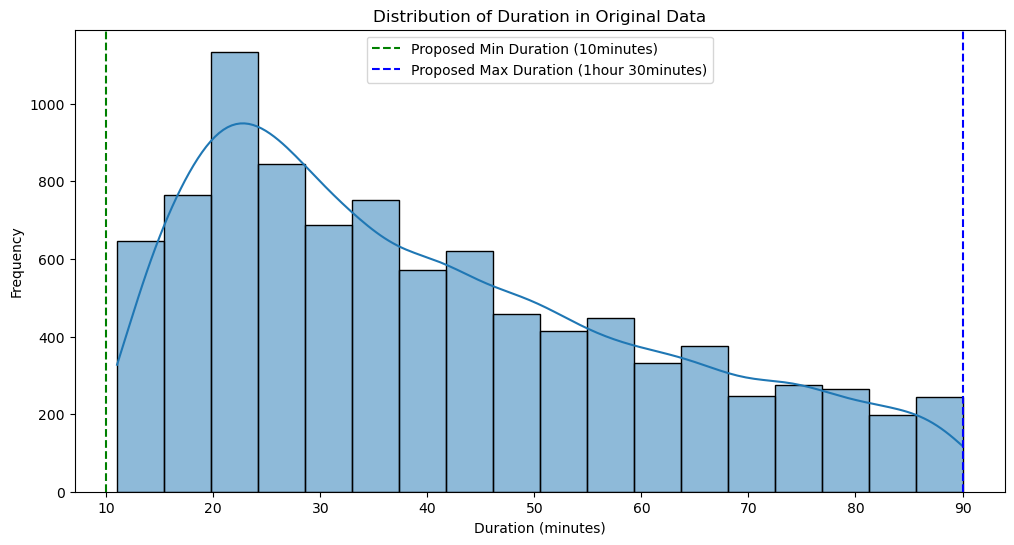

count    9276.000000
mean       40.695127
std        20.715836
min        11.000000
25%        23.000000
50%        36.000000
75%        55.000000
max        90.000000
Name: durationMinutes, dtype: float64


In [20]:
# Analyzing the distribution of measured distances
plt.figure(figsize=(12, 6))
sns.histplot(original_df['durationMinutes'], bins=18, kde=True)
plt.title('Distribution of Duration in Original Data')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# Setting x-axis limits to focus on the area with more routes
# For example, focusing on distances less than 500 meters
#plt.xlim(0, 300)

# initial and proposed thresholds
plt.axvline(10, color='g', linestyle='--', label='Proposed Min Duration (10minutes)')
plt.axvline(90, color='b', linestyle='--', label='Proposed Max Duration (1hour 30minutes)')
plt.legend()
plt.show()

# Display basic statistical details of the measured distances
distance_stats = original_df['durationMinutes'].describe()
print(distance_stats)

The durations of the routes fall within the anticipated range of 10 to 90 minutes. The average duration of a route is approximately 40 minutes, which aligns with my expectations for a typical Rappi delivery.

# Guajira Data

In [21]:
INPUT_DATETIME_FORMAT = "%m/%d/%y %H:%M"
OUTPUT_DATETIME_FORMAT = "%Y-%m-%d %H:%M"

original_df = pd.read_csv("./results/datos_guajira_processed.csv")
original_df['timestampStart'] = pd.to_datetime(original_df['timestampStart'], format=OUTPUT_DATETIME_FORMAT)
original_df['timestampEnd'] = pd.to_datetime(original_df['timestampEnd'], format=OUTPUT_DATETIME_FORMAT)
original_df['date'] = original_df['timestampStart'].dt.strftime("%Y-%m-%d")

## Number of Delivery Routes per Day, per Device

In [22]:
original_df_counts = original_df[['gpsID', 'date']].value_counts()
original_df_counts

gpsID    date      
Xch1559  2023-11-01    10
Xch1584  2023-11-20    10
Xch1559  2023-10-24    10
         2023-08-19     9
Xch1584  2023-11-24     8
                       ..
Xch1546  2023-10-18     1
         2023-10-19     1
Xch1561  2023-09-26     1
Xch1546  2023-10-27     1
Xch1584  2023-12-11     1
Length: 364, dtype: int64

## Minimum and Maximum Distance Analysis

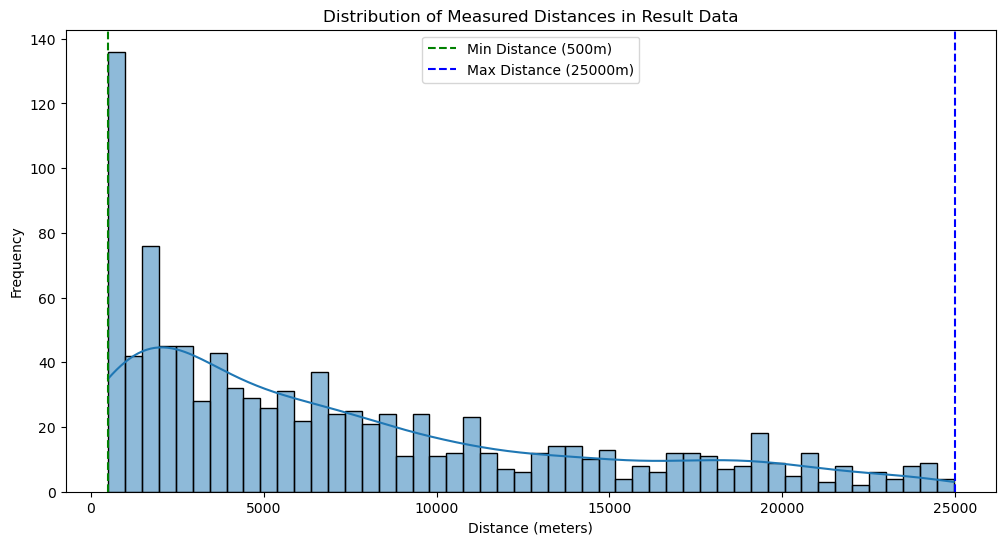

count     1011.000000
mean      7416.206400
std       6500.871038
min        500.886000
25%       1959.695000
50%       5426.080000
75%      11116.200000
max      24960.500000
Name: measuredDistance, dtype: float64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the distribution of measured distances
plt.figure(figsize=(12, 6))
sns.histplot(original_df['measuredDistance'], bins=50, kde=True)
plt.title('Distribution of Measured Distances in Result Data')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')

# Setting x-axis limits to focus on the area with more routes
# For example, focusing on distances less than 500 meters
#plt.xlim(0, 1200)

# initial and proposed thresholds
plt.axvline(500, color='g', linestyle='--', label='Min Distance (500m)')
plt.axvline(25000, color='b', linestyle='--', label='Max Distance (25000m)')
plt.legend()
plt.show()

# Display basic statistical details of the measured distances
distance_stats = original_df['measuredDistance'].describe()
print(distance_stats)

The analysis shows that we are actually filtering out data outside of the valid distance range for a driver delivery route. The average distance per route is 7.4 kilometers. 75% of the routes have a distance of less than 11.1 kilometers. Given these insights, and to align more closely with the realities of Rappi's operations and Bogotá's geography, I suggest setting the maximum distance for a valid delivery route at 15 kilometers. This threshold would provide a more realistic and practical framework for our analysis.

## Duration distribution analysis

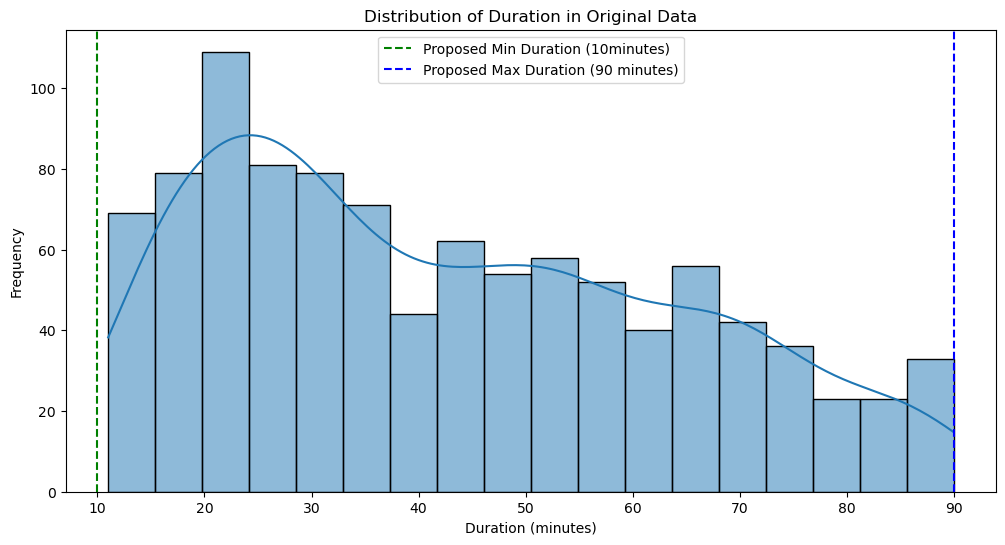

count    1011.000000
mean       42.742829
std        21.466417
min        11.000000
25%        24.000000
50%        39.000000
75%        59.500000
max        90.000000
Name: durationMinutes, dtype: float64


In [25]:
# Analyzing the distribution of measured distances
plt.figure(figsize=(12, 6))
sns.histplot(original_df['durationMinutes'], bins=18, kde=True)
plt.title('Distribution of Duration in Original Data')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# Setting x-axis limits to focus on the area with more routes
# For example, focusing on distances less than 500 meters
#plt.xlim(0, 300)

# initial and proposed thresholds
plt.axvline(10, color='g', linestyle='--', label='Proposed Min Duration (10minutes)')
plt.axvline(90, color='b', linestyle='--', label='Proposed Max Duration (90 minutes)')
plt.legend()
plt.show()

# Display basic statistical details of the measured distances
distance_stats = original_df['durationMinutes'].describe()
print(distance_stats)

The durations of the routes fall within the anticipated range of 10 to 90 minutes. The average duration of a route is approximately 42 minutes, which aligns with my expectations for a typical Rappi delivery.